In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
data = pd.read_csv("drive/MyDrive/archive/A_Z Handwritten Data/A_Z Handwritten Data.csv").astype('float32')

print(data.head(10))

     0  0.1  0.2  0.3  0.4  0.5  ...  0.643  0.644  0.645  0.646  0.647  0.648
0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
3  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
5  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
6  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
7  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
8  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
9  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0

[10 rows x 785 columns]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.loc[len(data)-1]


In [ ]:
data.head

In [ ]:
X = data.drop('0',axis = 1)
y = data['0']

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
print(train_x.values)

train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))

test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))


print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)


In [ ]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

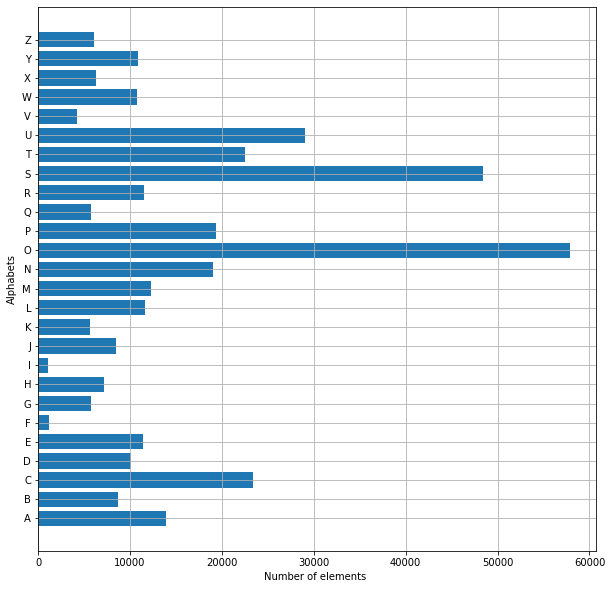

In [ ]:
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1
alphabets = []
for i in word_dict.values():
    alphabets.append(i)
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

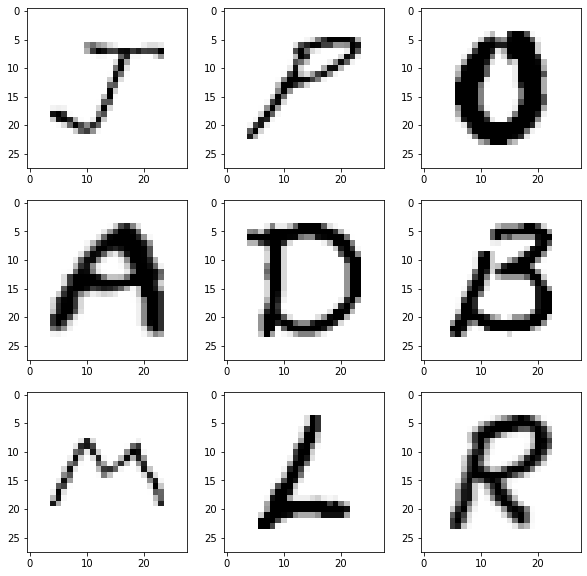

In [ ]:
shuff = shuffle(train_x[:100])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [ ]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of test data: ", test_X.shape)


New shape of train data:  (297960, 28, 28, 1)
New shape of test data:  (74490, 28, 28, 1)


In [ ]:
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)
test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

In [ ]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_yOHE, epochs=3,  validation_data = (test_X,test_yOHE))

Epoch 1/3
9312/9312 [==============================] - 395s 42ms/step - loss: 0.3804 - accuracy: 0.9121 - val_loss: 0.0857 - val_accuracy: 0.9753
Epoch 2/3
9312/9312 [==============================] - 402s 43ms/step - loss: 0.0746 - accuracy: 0.9796 - val_loss: 0.0749 - val_accuracy: 0.9785
Epoch 3/3
9312/9312 [==============================] - 408s 44ms/step - loss: 0.0614 - accuracy: 0.9833 - val_loss: 0.0637 - val_accuracy: 0.9824


In [ ]:
model.summary()
model.save(r'model_hand.h5')

In [ ]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9752987027168274, 0.9785474538803101, 0.9823734760284424]
The training accuracy is : [0.9571855068206787, 0.9801282286643982, 0.9836958050727844]
The validation loss is : [0.08573067933320999, 0.07491607964038849, 0.06367624551057816]
The training loss is : [0.15881487727165222, 0.07203242182731628, 0.061444588005542755]


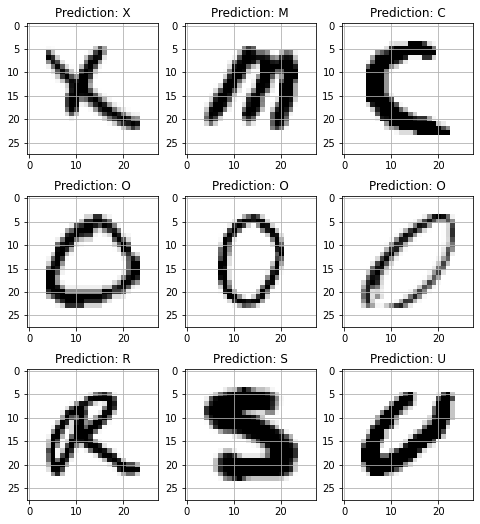

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)

    ax.grid()


In [ ]:
from PIL import Image, ImageOps
imagen = Image.open("drive/My Drive/ML Project/Drawings.jpg","r").resize((28,28))
imagen = ImageOps.grayscale(imagen)
pixels = np.asarray(imagen)
pixels = np.array([pixels])
unos = np.ones(784).reshape((28,28))
pixels = np.subtract(unos, pixels)
pixels = np.reshape(pixels,(28,28,1))
print(pixels.shape)



predictions = model.predict([pixels[0]])



In [ ]:
for i in pixels:
  for j in i:
    print(j, end="")
  print()

In [ ]:
for i in test_X[0]:
  for j in i:
    print(j, end="")
  print()

[0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.]
[0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.]
[0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.]
[0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.]
[0.][0.][0.][0.][0.][0.][0.][0.][0.][128.][255.][31.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.][0.]
[0.][0.][0.][0.][0.][0.][0.][0.][24.][226.][255.][92.][0.][0.][0.][0.][0.][0.][0.][0.][176.][166.][0.][0.][0.][0.][0.][0.]
[0.][0.][0.][0.][0.][0.][0.][0.][112.][255.][255.][112.][0.][0.][0.][0.][0.][0.][0.][0.][235.][240.][0.][0.][0.][0.][0.][0.]
[0.][0.][0.][0.][0.][0.][0.][0.][112.][255.][255.][112.][0.][0.][0.][0.][0.][0.][0.][54.][252.][173.][0.][0.][0.][0.][0.][0.]
[0.][0.][0.][0.][0.][0.][0.][0.][163.][255.][239.][77.][

In [ ]:
print(pixels.shape, test_X[0].shape)

(1, 28, 28, 1) (28, 28, 1)


In [ ]:
fig, ax = plt.subplots(figsize=(8,9))
img = pixels.reshape(28, 28)
ax.imshow(img, cmap="Greys")
pred = word_dict[np.argmax(predictions)]
ax.set_title("Prediction: "+pred+", {:.2f}%".format (max(predictions[0])*100))
    


ax.grid()

In [1]:
predictions


NameError: ignored